In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
sns.set_style('darkgrid')

In [4]:
player = pd.read_feather('../../Data Source/Football Transfer/TopScorer')
playtime = pd.read_feather('../../Data Source/Football Transfer/TopScorer_Playtime')

In [15]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    14 non-null     float64
 1   player_name                  14 non-null     object 
 2   current_age                  14 non-null     float64
 3   height_in_cm                 14 non-null     float64
 4   domestic_competition_id      14 non-null     object 
 5   club_name                    14 non-null     object 
 6   game_played                  14 non-null     float64
 7   club_play_minute             14 non-null     float64
 8   minutes_played               14 non-null     float64
 9   goal_per_game                14 non-null     float64
 10  last_season_goals            14 non-null     float64
 11  assist_per_game              14 non-null     float64
 12  last_season_assists          14 non-null     float64
 13  market_value_in_eur   

In [16]:
playtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_name      50 non-null     object
 1   season           50 non-null     Int64 
 2   season_playtime  50 non-null     Int64 
 3   match_played     50 non-null     object
dtypes: Int64(2), object(2)
memory usage: 1.8+ KB


In [17]:
for i in player.columns:
    if i == 'player_name' or i == 'club_name' or i == 'domestic_competition_id':
        player[i] = player[i].astype(str)
    else:
        player[i] = player[i].astype(float)
        
for i in playtime.columns:
    if i == 'player_name':
        playtime[i] = playtime[i].astype(str)
    else:
        playtime[i] = playtime[i].astype(int)

In [7]:
league = player['domestic_competition_id'].unique().tolist()
league_match = [34, 34, 34, 38, 38]
league_match_number = {league[i] : league_match[i] for i in range(len(league))}


In [8]:
def AttendRate(row):
    league = row['domestic_competition_id']
    playtime_in_club = row['club_play_minute']
    league_total_time = league_match_number[league] * 90
    rate = playtime_in_club/league_total_time
    return rate

In [9]:
player['Attendance_Rate_In_Club'] = player[['domestic_competition_id', 'club_play_minute']].apply(AttendRate, axis=1)

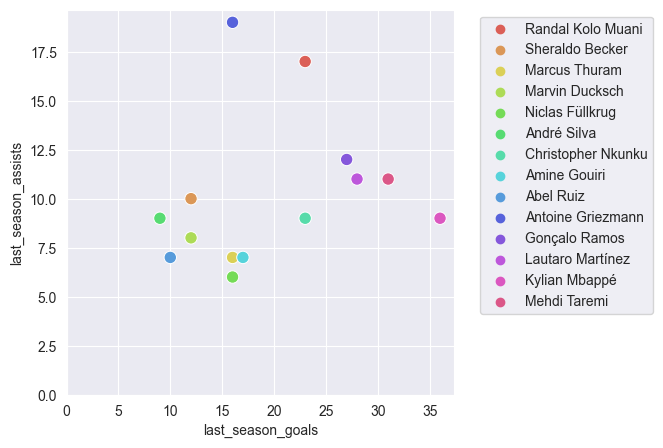

In [10]:
fig, ax =plt.subplots(figsize=(5,5))
ax = sns.scatterplot(data=player, x='last_season_goals', y='last_season_assists', hue='player_name', palette='hls', s=80)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

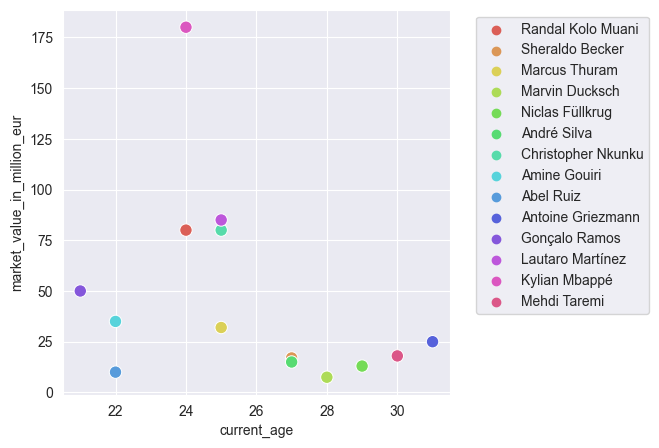

In [11]:
fig2, ax2 = plt.subplots(figsize=(5,5))

ax2 = sns.scatterplot(data=player, x='current_age', y='market_value_in_million_eur', hue='player_name', palette='hls', s=80)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

<Axes: >

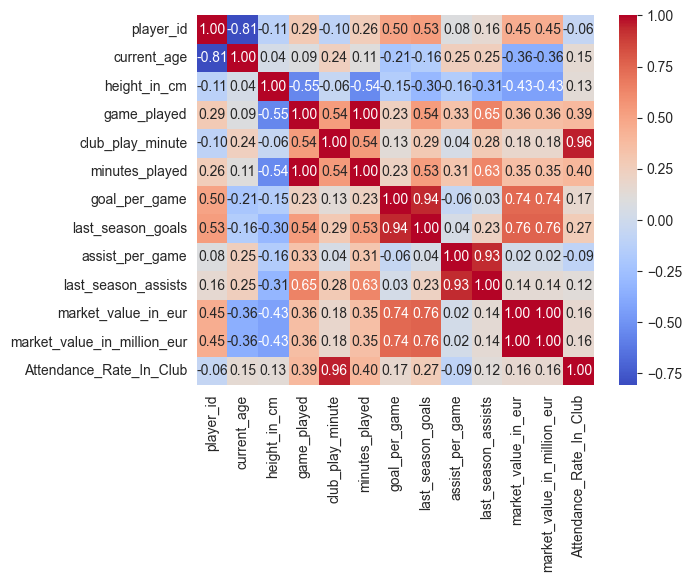

In [12]:
sns.heatmap(player.select_dtypes(include=['float', 'int']).corr(), annot=True, fmt='.2f',cmap='coolwarm')

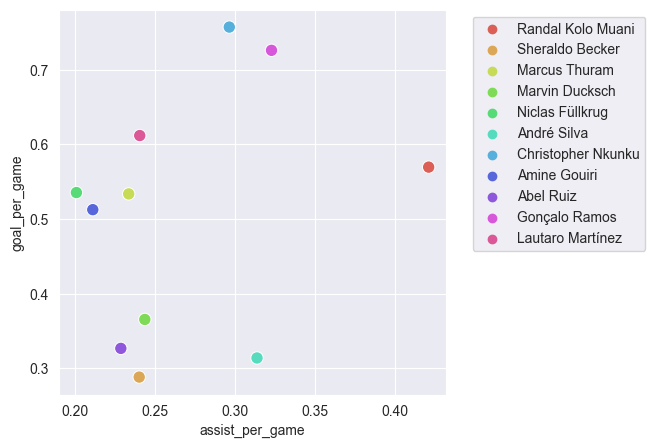

In [13]:
filtered = player[(player['current_age'] < 30) & (player['market_value_in_eur'] < 90000000)]

fig3 ,ax3 = plt.subplots(figsize=(5, 5))
ax3 = sns.scatterplot(data=filtered, x = 'assist_per_game', y = 'goal_per_game', hue = 'player_name', palette='hls', s = 80)
#ax3.set_xlim(left=0)
#ax3.set_ylim(bottom=0)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.show()

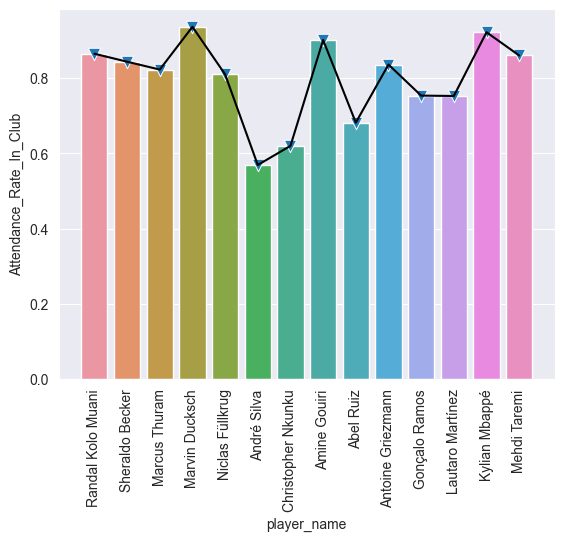

In [58]:
fig, ax = plt.subplots()
ax = sns.barplot(data=player, x='player_name', y='Attendance_Rate_In_Club')
ax = sns.lineplot(data=player, x='player_name', y='Attendance_Rate_In_Club', color='black')
ax = sns.scatterplot(data=player, x='player_name', y='Attendance_Rate_In_Club', s=80, marker='v')
plt.xticks(rotation=90)
plt.show()

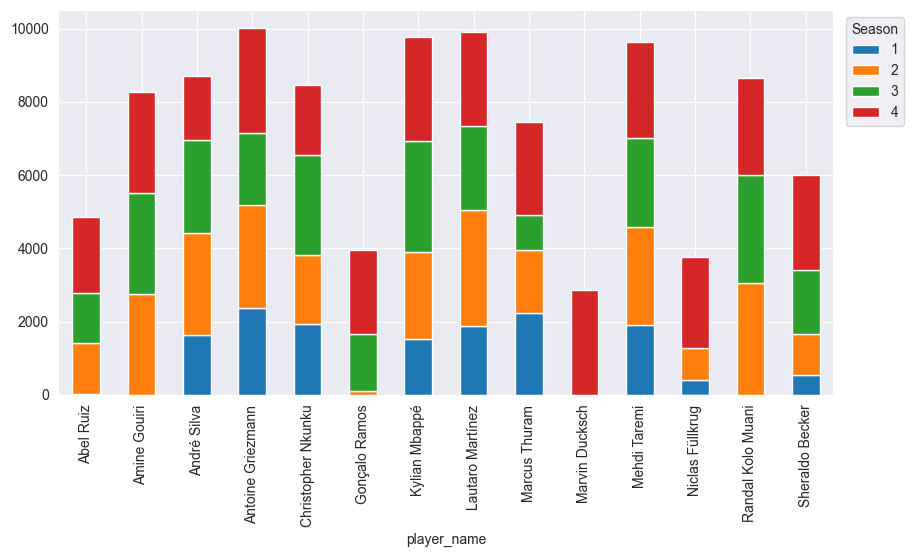

In [64]:
playtime_plot = playtime[['player_name', 'season','season_playtime']].pivot_table(values='season_playtime', index='player_name', columns='season')

ax = playtime_plot.plot(kind='bar', stacked=True, figsize=(10,5))
plt.legend(loc='best', bbox_to_anchor=(1.1, 1), title='Season')
plt.show()


In [53]:
playtime_plot

season,1,2,3,4
player_name,,,,
Abel Ruiz,22.0,1381.0,1378.0,2086.0
Amine Gouiri,1.0,2753.0,2764.0,2759.0
André Silva,1641.0,2773.0,2542.0,1760.0
Antoine Griezmann,2371.0,2808.0,1971.0,2860.0
Christopher Nkunku,1925.0,1894.0,2733.0,1897.0
Gonçalo Ramos,NaN,96.0,1565.0,2306.0
Kylian Mbappé,1515.0,2387.0,3032.0,2822.0
Lautaro Martínez,1872.0,3170.0,2298.0,2574.0
Marcus Thuram,2228.0,1738.0,953.0,2518.0


In [57]:
playtime_plot = playtime[['player_name', 'season','season_playtime']].pivot_table(values='season_playtime', index='player_name', columns='season')
playtime_plot.loc['Abel Ruiz']

season
1      22.0
2    1381.0
3    1378.0
4    2086.0
Name: Abel Ruiz, dtype: float64